In [2]:
from common_imports import 

We're using the encoding parameter so that we can deal with the different format of different CSV files

In [10]:
# we can use 2 arguements for encoding = 'latin-1' or 'iso-8859-1'
# Both of these will yields us the same result

In [18]:
data = pd.read_csv('Datasets/10_Forest_fires_amazon.csv',encoding='iso-8859-1',parse_dates=['date'])

In [20]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [21]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [23]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [26]:
print('The number of rows are: ',data.shape[0])
print('The number of columns are: ',data.shape[1])

The number of rows are:  6454
The number of columns are:  5


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [37]:
data.duplicated().any()

True

In [38]:
data = data.drop_duplicates()

In [43]:
data.describe(include='all',datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Outubro,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [44]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [93]:
monthly_fires = data.groupby('month')['number'].sum().sort_values().reset_index()
monthly_fires

,month,number
0,Abril,28184.770
1,Março,30709.405
2,Fevereiro,30839.050
3,Maio,34725.363
4,Janeiro,47681.844
5,Junho,55997.675
6,Dezembro,57535.480
7,Setembro,58578.305
8,Novembro,85508.054
9,Agosto,88050.435


If you reset index, you won't have to use the values and indexes in x and y, you directly use the column names

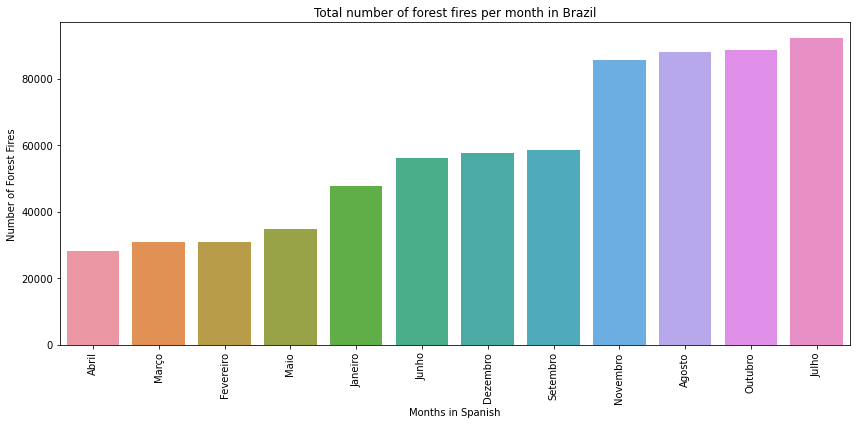

In [94]:
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='number',data=monthly_fires)
plt.xlabel('Months in Spanish')
plt.ylabel('Number of Forest Fires')
plt.xticks(rotation=90)
plt.title('Total number of forest fires per month in Brazil')
plt.tight_layout()
plt.show()

In [95]:
yearly_fires = data.groupby('year')['number'].sum().sort_values().reset_index()
yearly_fires

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2008,29378.964
5,2007,33028.413
6,2006,33824.161
7,2011,34633.545
8,2005,35004.965
9,2013,35137.118


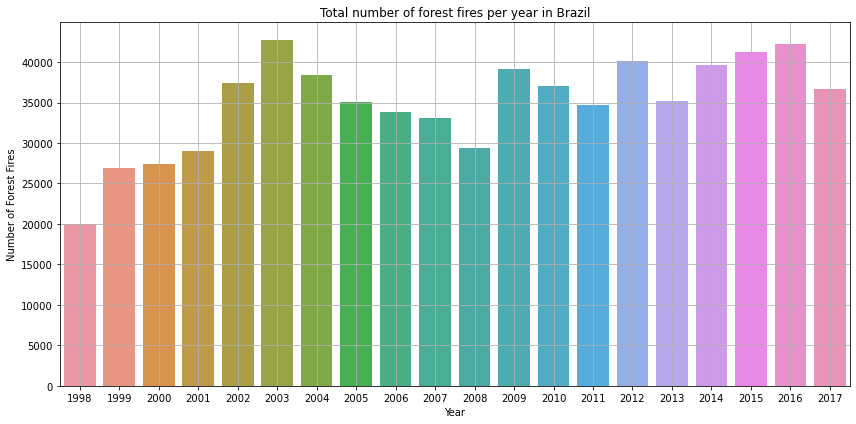

In [98]:
plt.figure(figsize=(12,6))
sns.barplot(x='year',y='number',data=yearly_fires)
plt.xlabel('Year')
plt.ylabel('Number of Forest Fires')
# plt.xticks(rotation=90)
plt.title('Total number of forest fires per year in Brazil')
plt.grid(True)
plt.tight_layout()
plt.show()

In [99]:
state_fires = data.groupby('state')['number'].sum().sort_values().reset_index()
state_fires

,state,number
0,Sergipe,3237.000
1,Distrito Federal,3561.000
2,Alagoas,4606.000
3,Espirito Santo,6546.000
4,Acre,18464.030
5,Rondonia,20285.429
6,Amapa,21831.576
7,Santa Catarina,24359.852
8,Roraima,24385.074
9,Pernambuco,24498.000


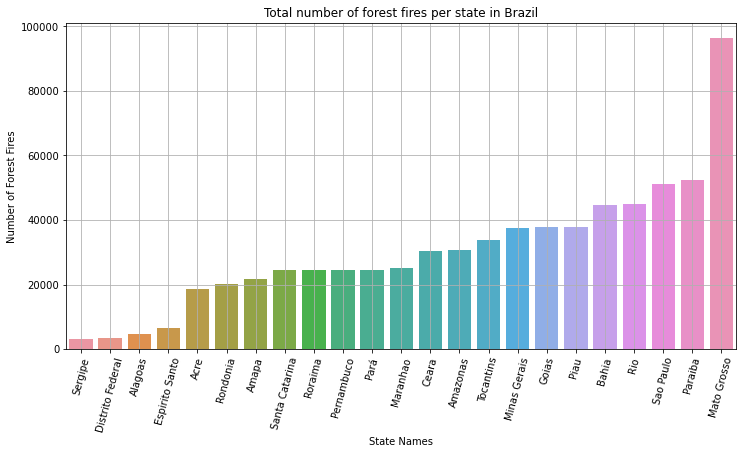

In [104]:
plt.figure(figsize=(12,6))
sns.barplot(x='state',y='number',data=state_fires)
plt.xlabel('State Names')
plt.ylabel('Number of Forest Fires')
plt.xticks(rotation=75)
plt.title('Total number of forest fires per state in Brazil')
plt.grid(True)
plt.show()

In [105]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [111]:
data4 = data[data['state']=='Amazonas']

In [116]:
data5 = data4.groupby('year')['number'].sum().reset_index()

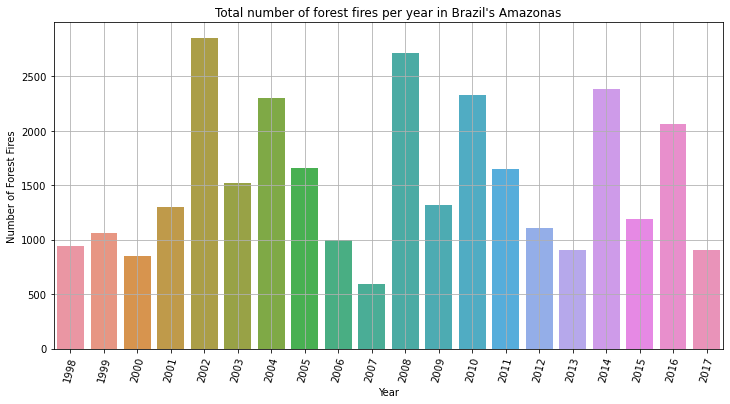

In [117]:
plt.figure(figsize=(12,6))
sns.barplot(x='year',y='number',data=data5)
plt.xlabel('Year')
plt.ylabel('Number of Forest Fires')
plt.xticks(rotation=75)
plt.title("Total number of forest fires per year in Brazil's Amazonas")
plt.grid(True)
plt.show()

In [118]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [135]:
amz = data[data['state'] == 'Amazonas']
day = amz.groupby(amz['date'].dt.dayofweek).sum().number

import calendar
day.index = [calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()

<AxesSubplot:xlabel='index', ylabel='number'>

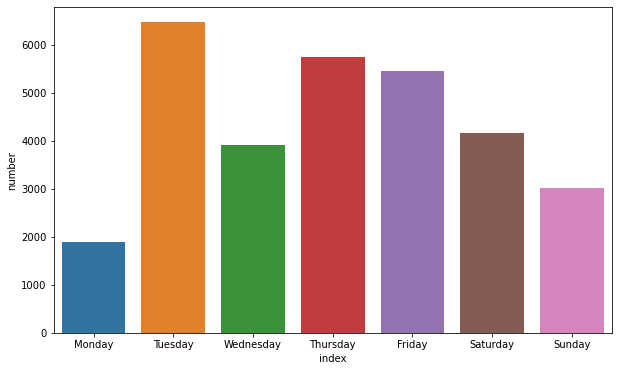

In [137]:
plt.figure(figsize=(10,6))
sns.barplot(x='index',y='number',data=day)

In [146]:
year_2015 = data[data['year'] == 2015]
data_2015=year_2015.groupby('month')['number'].sum().reset_index()
data_2015

,month,number
0,Abril,2573.000
1,Agosto,4363.125
2,Dezembro,4088.522
3,Fevereiro,2309.000
4,Janeiro,4635.000
5,Julho,4364.392
6,Junho,3260.552
7,Maio,2384.000
8,Março,2202.000
9,Novembro,4034.518


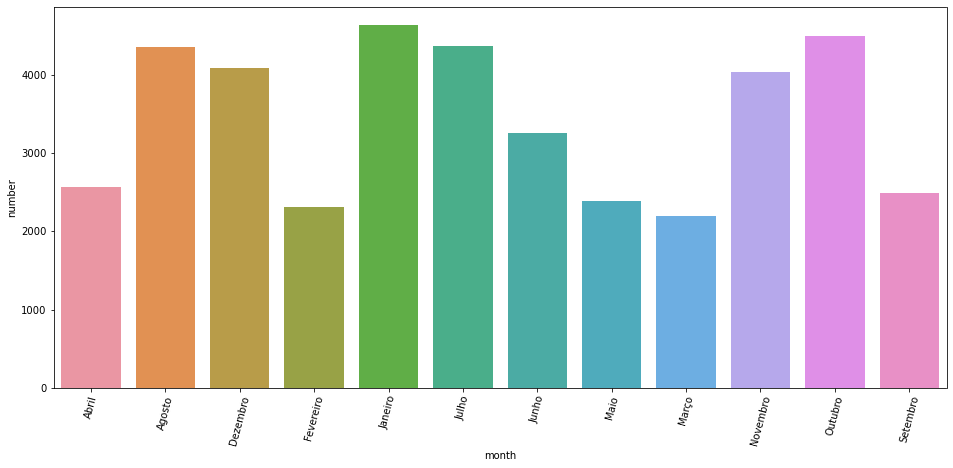

In [150]:
plt.figure(figsize=(16,7))
sns.barplot(x='month',y='number',data=data_2015)
plt.xticks(rotation=75)
plt.show()

In [151]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')